# Trabalhar com dados do FED.



Risk Free Rate dos EUA

In [1]:
!pip install pandas_datareader 

!pip install matplotlib

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from scipy.stats import zscore
import pandas_datareader.data as web
import plotly.express as px
import datetime

import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 2.Para fins de precificação

Bonds norte-americanos

In [ ]:
bond3m = web.DataReader('DGS3', 'fred', comeco)
px.line(bond3m, x=bond3m.index,y='DGS3')

bond10y = web.DataReader('DGS10', 'fred', comeco)
px.line(bond10y, x=bond10y.index,y='DGS10')

bond20y = web.DataReader('DGS20', 'fred', comeco)
px.line(bond20y, x=bond20y.index,y='DGS20')

bond1y = web.DataReader('DGS1', 'fred', comeco)
px.line(bond1y, x=bond1y.index,y='DGS1')

In [ ]:
fig1, f1_axes = plt.subplots(ncols=2, nrows=2)


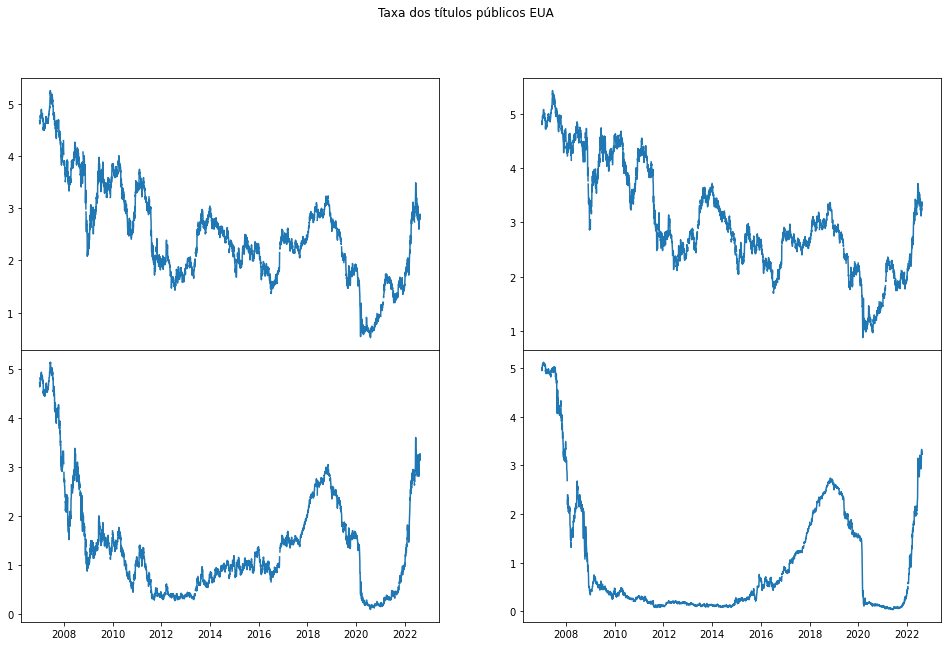

In [ ]:
fig, axs = plt.subplots(2, 2,sharex=True, gridspec_kw={'hspace':0}, figsize= (16.5,10))
fig.suptitle('Taxa dos títulos públicos EUA')
axs[0,0].plot(bond10y, )
axs[0,1].plot(bond20y)
axs[1,0].plot(bond3m)
axs[1,1].plot(bond1y)




# **Recessão técnica?**


National Bureau of Economic Research (NBER) fornece: “queda significativa na atividade econômica que se espalha pela economia e permanece por mais de alguns meses”. Os critérios adotados são a profundidade, difusão e duração da queda. Poder-se-ia afirmar que dois trimestres consecutivos de PIB decrescente bastariam para identificar uma recessão, mas são necessários outros indicadores como produção industrial e pedidos de seguro-desemprego. Outro termo conhecido: a depressão, também é definido pelo NBER. Ele é “costumeiramente usado para se referir por um período particularmente severo de enfraquecimento econômico”, e.g., a queda no PIB real entre 1930 e 1933 foi de aproximadamente 30%, correspondendo a 43 meses.

Referência:

The NBER’s Recession Dating Procedure. Business Cycle Dating Committee, National Bureau of Economic Research Disponível em:< https://www.nber.org/cycles/recessions.pdf>. Acessado em 25 de agosto de 2020.


The NBER's Business Cycle Dating Procedure: Frequently Asked Questions. Disponível em:<https://www.nber.org/cycles/recessions_faq.html#:~:text=A%3A%20The%20NBER%20does%20not%20separately%20identify%20depressions%20in%20its,severe%20period%20of%20economic%20weakness.>. Acessado em 25 de agosto de 2020.



In [4]:
comeco = datetime.datetime(2018,1,1)

gdp = web.DataReader('GDP', 'fred', comeco)
px.bar(data_frame=gdp.pct_change()*100, x=gdp.index, y='GDP', labels={'GDP':'GDP (%)'})

In [5]:
comeco = datetime.datetime(2019,1,1)




cpi = web.DataReader('CPIAUCSL', 'fred',comeco)
cpi


#Transformar o índice em variação percentual mensal
px.bar(data_frame=cpi.pct_change()*100, x=cpi.index, y='CPIAUCSL', labels={'CPIAUCSL':'CPI (%)'})

In [9]:
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df

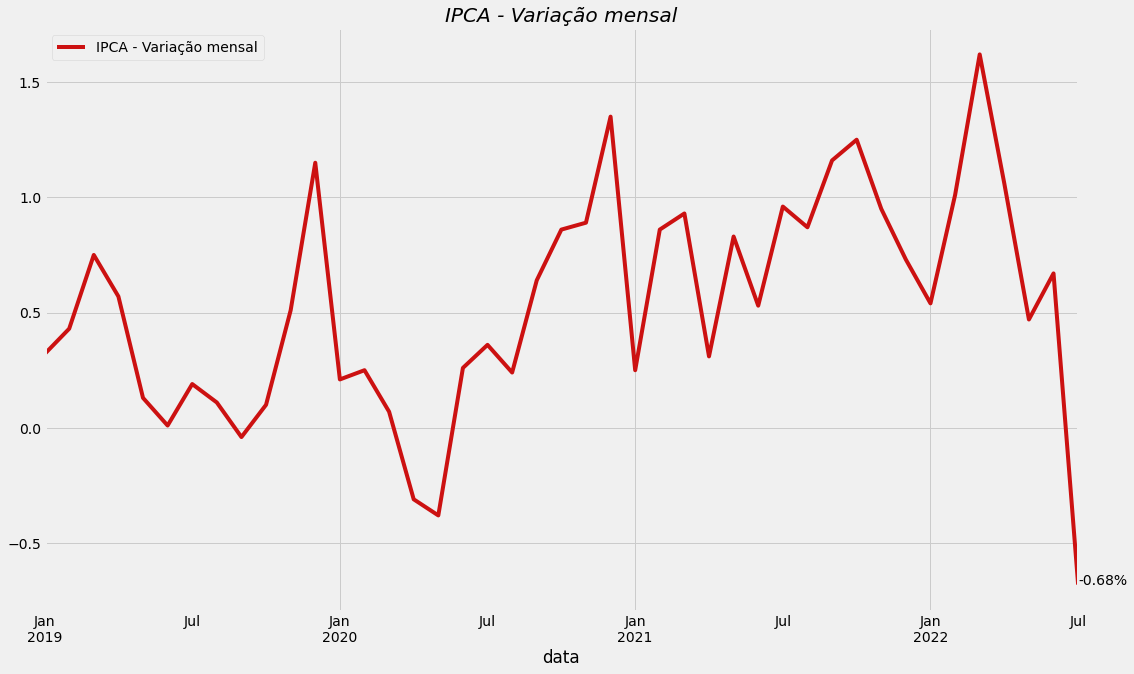

In [10]:
ipca = consulta_bc(433)

#Caso queira ver no último ano os dados
ipca1 = ipca[ipca.index.year >=2019]





l16 = 'IPCA - Variação mensal'

plt.style.use('fivethirtyeight')
ipca1.plot(figsize= (16.5,10), color = (204/255,17/255,17/255))
plt.text(ipca1.index[len(ipca1)-1],ipca1['valor'][len(ipca1)-1], s ="{}%".format(ipca1['valor'][-1]),ha='left', va='baseline')
plt.title(label = l16, loc="center",fontstyle='italic')
plt.legend([l16])

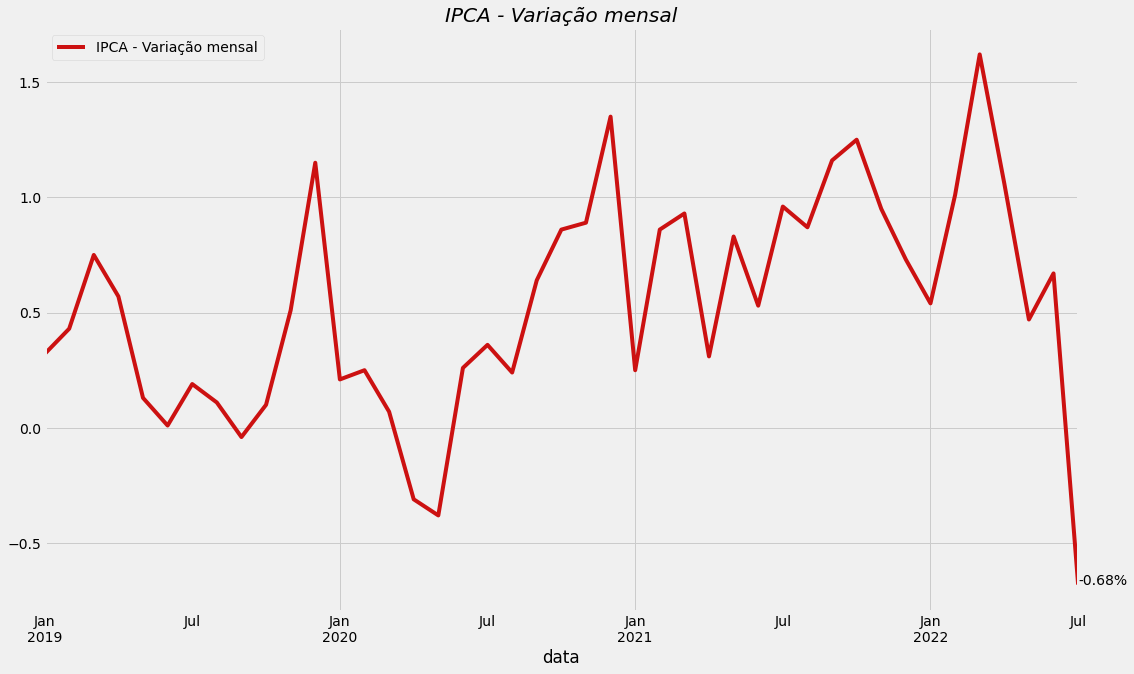

In [23]:
ipca = consulta_bc(433)

#Caso queira ver no último ano os dados
ipca1 = ipca[ipca.index.year >=2019]





l16 = 'IPCA - Variação mensal'

plt.style.use('fivethirtyeight')
ipca1.plot(figsize= (16.5,10), color = (204/255,17/255,17/255))
plt.text(ipca1.index[len(ipca1)-1],ipca1['valor'][len(ipca1)-1], s ="{}%".format(ipca1['valor'][-1]),ha='left', va='baseline')
plt.title(label = l16, loc="center",fontstyle='italic')
plt.legend([l16])

In [ ]:
px.bar(data_frame=ipca1, x=ipca1.index, y='valor', labels={'valor':'IPCA mensal (%)'})

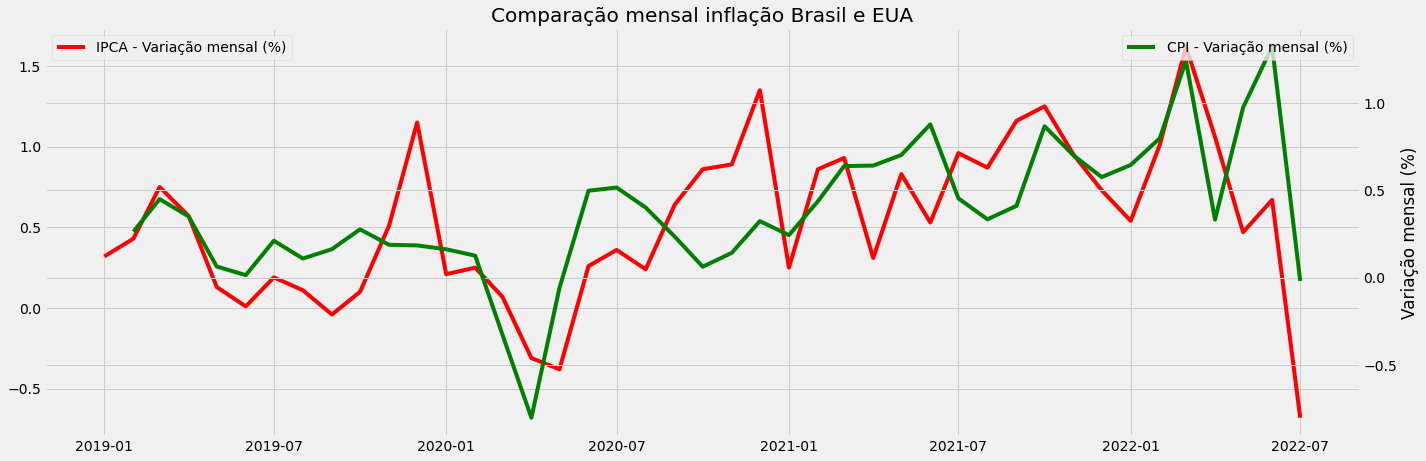

In [24]:
plt.rcParams['figure.figsize'] = [21,7]
plt.style.use('fivethirtyeight')

fig, ax1 = plt.subplots()

ax1.plot(ipca1.index, ipca1, color = 'r', label = 'IPCA - Variação mensal (%)')
ax1.set_label('IPCA - Variação mensal (%)')

ax2 = ax1.twinx()
ax2.plot(cpi.index, cpi.pct_change()*100, color ='g', label = 'CPI - Variação mensal (%)')
ax2.set_ylabel('Variação mensal (%)')

plt.title('Comparação mensal inflação Brasil e EUA')

ax1.legend(loc=0)
ax2.legend(loc=1)

plt.show()

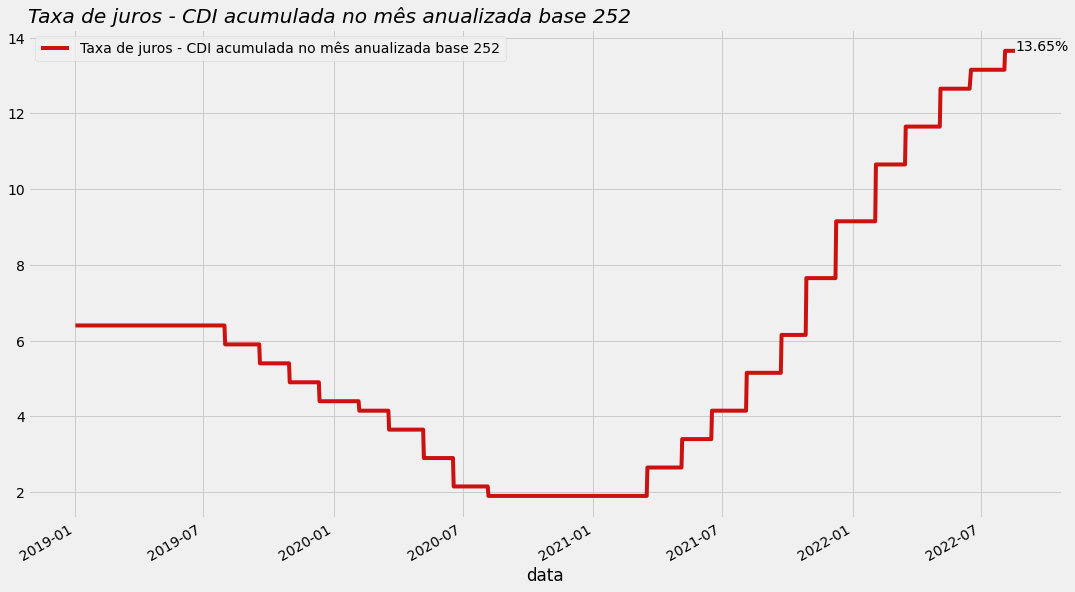

In [35]:
cdi = consulta_bc(4389)
cdi = cdi[cdi.index.year >=2019]

l16 = 'Taxa de juros - CDI acumulada no mês anualizada base 252'

plt.style.use('fivethirtyeight')
cdi.plot(figsize= (16.5,10), color = (204/255,17/255,17/255))
plt.text(cdi.index[len(cdi)-1],cdi['valor'][len(cdi)-1], s ="{}%".format(cdi['valor'][-1]),ha='left', va='baseline')
plt.title(label = l16, loc="left",fontstyle='italic')
plt.legend([l16])

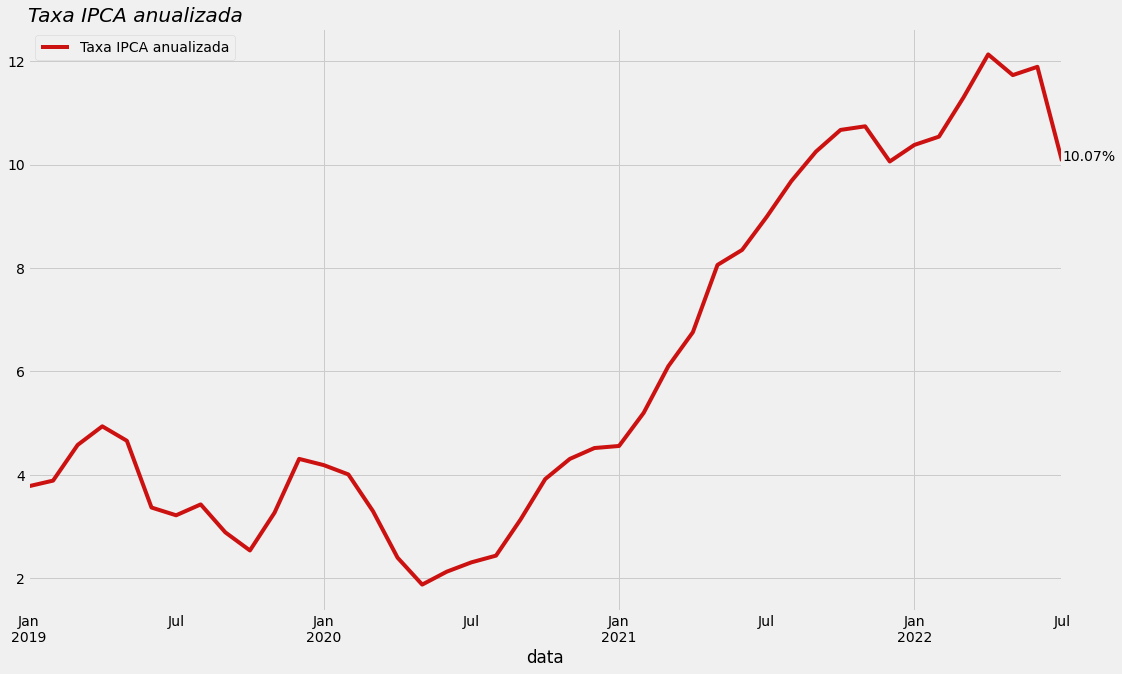

In [36]:


ipcanual = consulta_bc(13522)
ipcanual = ipcanual[ipcanual.index.year >=2019]

l16 = 'Taxa IPCA anualizada'

plt.style.use('fivethirtyeight')
ipcanual.plot(figsize= (16.5,10), color = (204/255,17/255,17/255))
plt.text(ipcanual.index[len(ipcanual)-1],ipcanual['valor'][len(ipcanual)-1], s ="{}%".format(ipcanual['valor'][-1]),ha='left', va='baseline')
plt.title(label = l16, loc="left",fontstyle='italic')
plt.legend([l16])

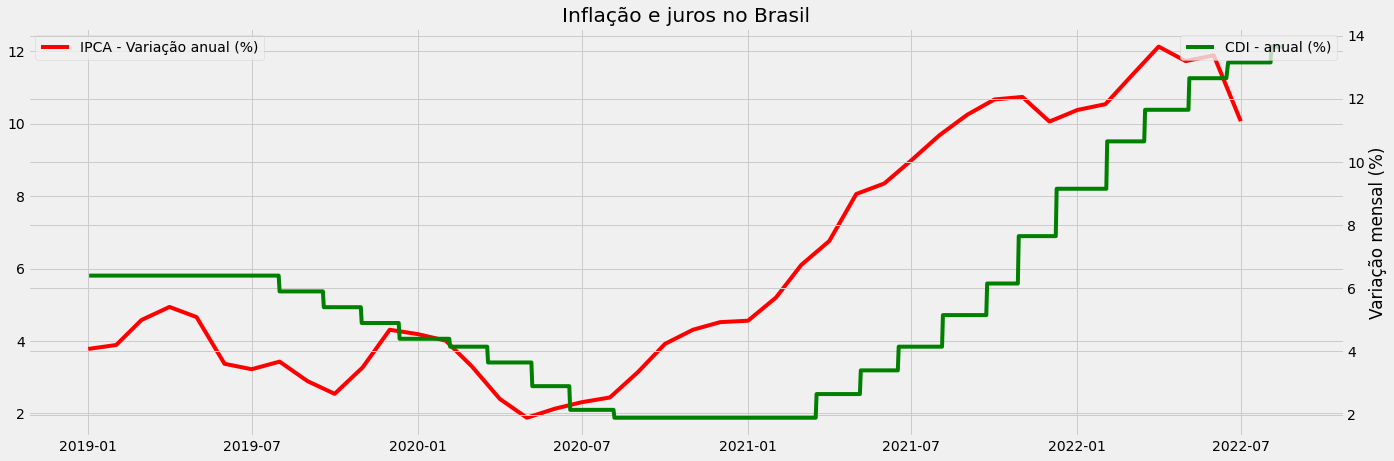

In [37]:
plt.rcParams['figure.figsize'] = [21,7]
plt.style.use('fivethirtyeight')

fig, ax1 = plt.subplots()

ax1.plot(ipcanual.index, ipcanual, color = 'r', label = 'IPCA - Variação anual (%)')
ax1.set_label('IPCA - Variação anual (%)')

ax2 = ax1.twinx()
ax2.plot(cdi.index, cdi, color ='g', label = 'CDI - anual (%)')
ax2.set_ylabel('Variação mensal (%)')

plt.title('Inflação e juros no Brasil')

ax1.legend(loc=0)
ax2.legend(loc=1)

plt.show()

#**Desemprego nos EUA**


Análise do desemprego para diferentes categorais


<Figure size 72x72 with 0 Axes>

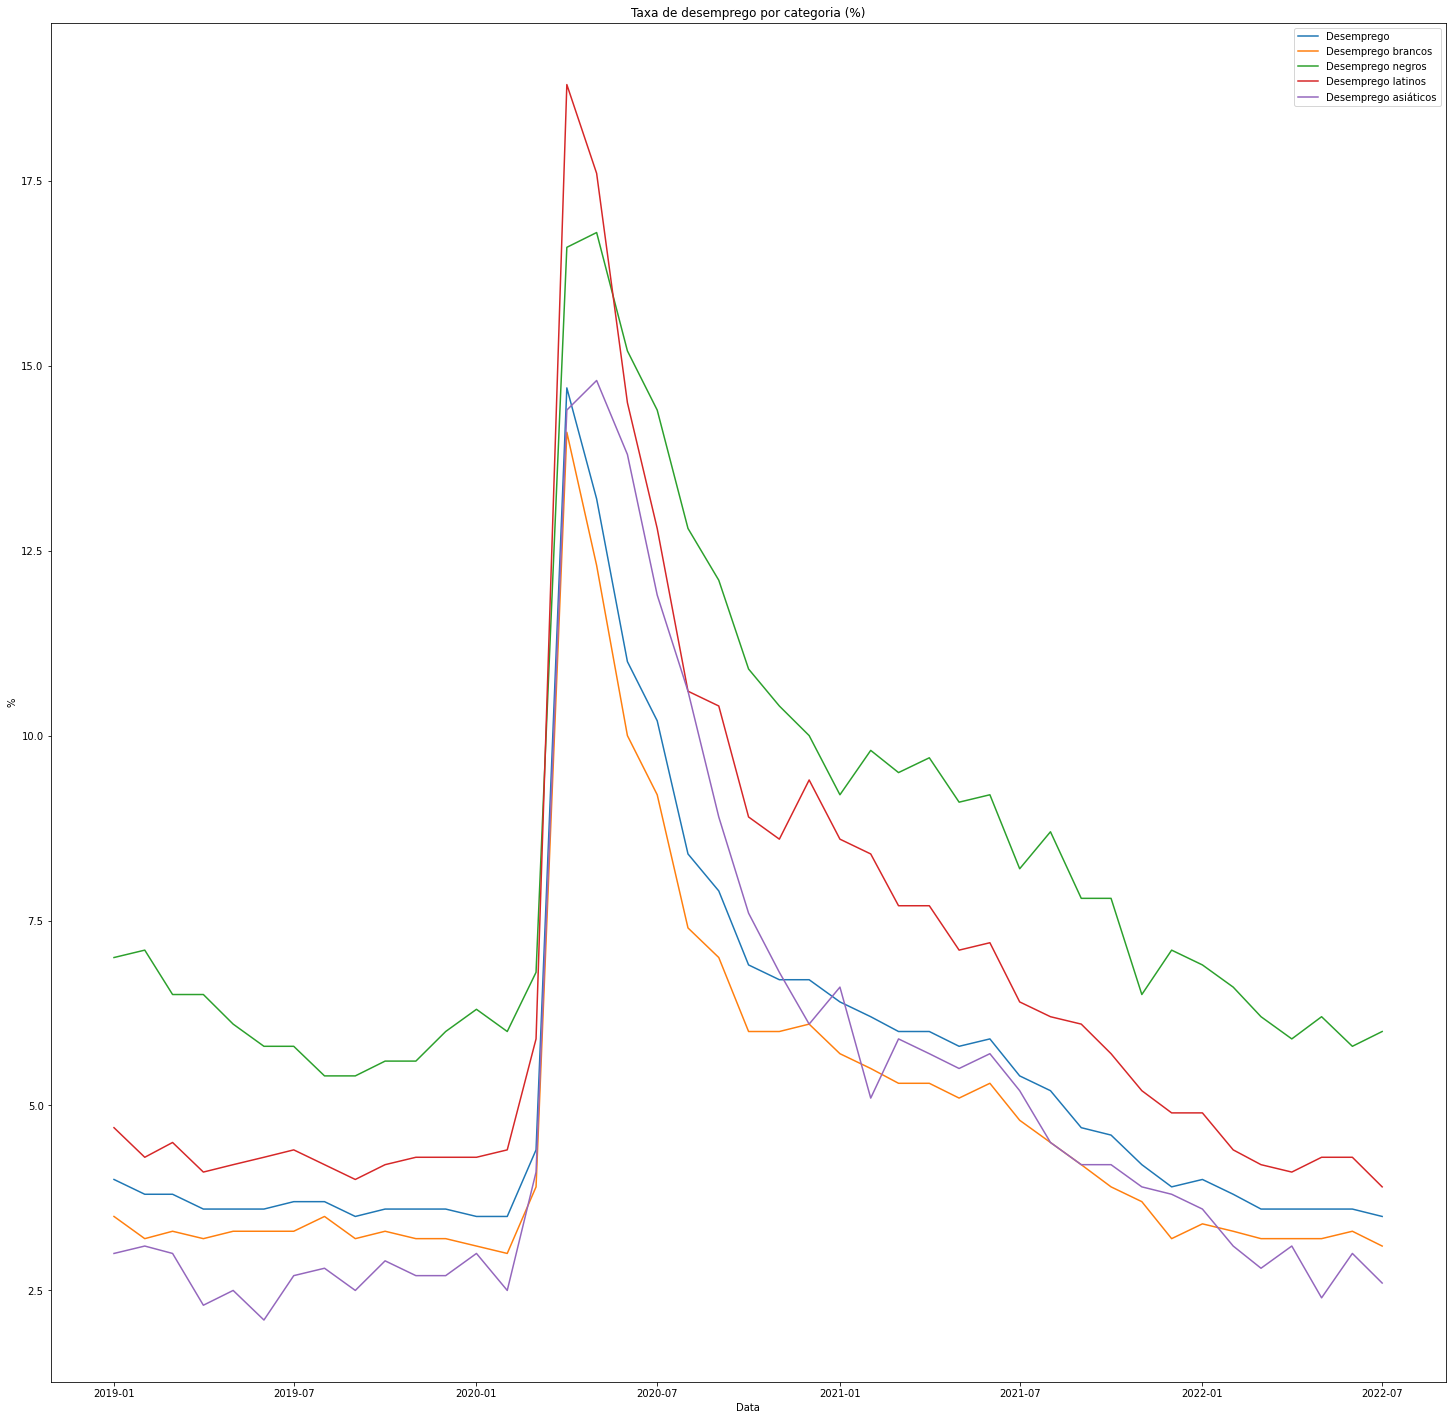

<Figure size 72x72 with 0 Axes>

In [ ]:
comeco = datetime.datetime(2019,1,1)

series_fed = ['UNRATE','LNS14000003','LNS14000006','LNS14000009','LNS14032183']

dados = web.DataReader(series_fed, 'fred', comeco)

dados.columns = ['Desemprego', 'Desemprego brancos', 'Desemprego negros',
           'Desemprego latinos',
           'Desemprego asiáticos']

plt.plot(dados.index, dados)
#Acréscimos gráfico
plt.title('Taxa de desemprego por categoria (%)')
plt.ylabel('%')
plt.xlabel('Data')
plt.legend(dados.columns)
plt.figure(figsize=(1, 1))
#plt.rcParams['figure.figsize'] = [25, 25]

#plt.figure(figsize=(100,100)) 



In [ ]:
result = dados.loc[['2019-01-01', '2022-07-01']]

result

,Desemprego,Desemprego brancos,Desemprego negros,Desemprego latinos,Desemprego asiáticos
DATE,,,,,
2019-01-01,4.0,3.5,7.0,4.7,3.0
2022-07-01,3.5,3.1,6.0,3.9,2.6
